In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import emoji
import re
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [2]:
## Loading chat data
file = open("chat.txt")

In [3]:
data = file.read()

In [4]:
## First have to split the data based on the date and time.
## I will use the regex to do so
pattern = "\d{1,2}/\d{1,2}/\d{1,2},\s\d{1,2}:\d{1,2}\s.M"

In [5]:
## Finding the all messages.
message = re.split(pattern, data)[1:]
## First line is empty string

In [6]:
## Now finding the all dates and times
dates = re.findall(pattern, data)

In [7]:
## Checking the size of dates and messges
len(dates), len(message)

(984, 984)

In [8]:
## Not putting both in data frame.
df = pd.DataFrame({'date':dates, "message":message})

In [9]:
# df.shape

In [ ]:
df.head()

In [11]:
## Converting the date columns into date times
## Cleaning the date columns
df['date'] = pd.to_datetime(df['date'].str.replace(',',''))

In [12]:
## Extracting the date and time individually
df['year'] = df['date'].dt.year

In [13]:
## Extracing the month in the form of month string.
df['month'] = df['date'].dt.month_name()

In [14]:
## Date
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [ ]:
## Now splitting the sender and their message respectively
df.head()

In [ ]:
## Now splitting the message with respece to sender and their messages.
print(df['message'][3])
print(df['message'][2])
print(df['message'][40])

In [17]:
## Function to find mobile number and names
def find_sender(x):
    pattern = "^\s-\s([\w\s\d+]+):"
    res = re.search(pattern, x)
    if res == None:
        return ""
    else:
        return res[1]

In [18]:
df['sender'] = df['message'].apply(lambda x : find_sender(x))

In [19]:
## The message which have no sender means
## they are function message like, group creation, member added
## So removing such kind of message
indices = df[df['sender'] == ""].index
df.drop(indices, inplace = True)

In [ ]:
## Now seperating the text from message
pattern = "^\s-\s[\w\s\d+]+:"
df['text'] = df['message'].apply(lambda x : re.split(pattern, x)[1])\
            .str.replace('\\n','').str.strip().str.lower()

In [21]:
df.drop(['date','message'], axis=1, inplace=True)

In [ ]:
df.head()

In [23]:
def member_count(df):
    return len(df['sender'].unique())

In [24]:
def member_list(df):
    return df['sender'].unique()

In [25]:
def total_media(df):
    id = "<media omitted>"
    return df['text'].apply(lambda x  : x.count(id)).sum()

In [84]:
def emoji_table(df):
  emj = []
  emoji_dict = emoji.get_emoji_unicode_dict('en')
  for row in df['text']:
    for c in row:
      if emoji.demojize(c) in emoji_dict:
        emj.append(c)
  return dict(Counter(emj).most_common(10))

In [ ]:
emoji_table(df.keys())

In [75]:
def most_busy_user_plot(df):
    return df['sender'].value_counts()[ :10].plot(kind='bar')

In [72]:
def most_busy_user_perc(df):
    return df['sender'].value_counts()[:10]/df['sender'].shape[0] * 100

In [106]:
def total_words(df):
    words = []
    for row in df['text']:
        for word in row.split():
            if word != '<media' and word != 'omitted>':
                words.append(word)
    return words

In [107]:
def total_links(df):
    pattern = "https?:"
    return df['text'].apply(lambda x : len(re.findall(pattern, x))).sum()

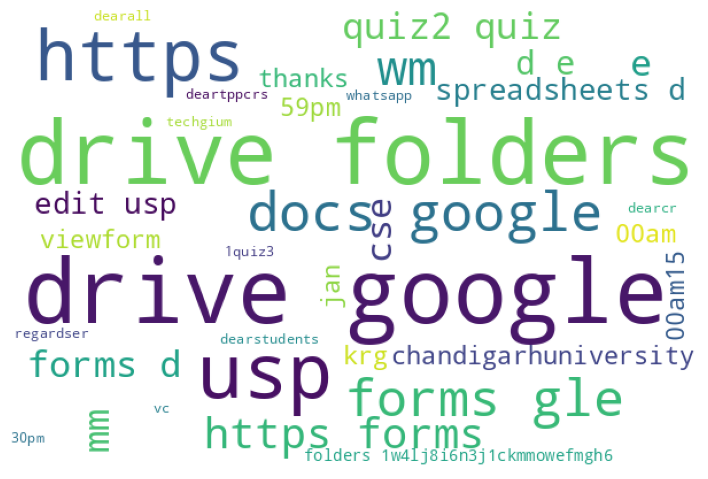

In [110]:
wordcloud = WordCloud(width = 600, height =400,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate("".join(total_words(df)))

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 4)
plt.show()